# Distribuição de frequencia

Primeiro criamos uma tabela com todos os valores e depois outra com esses valores organizados

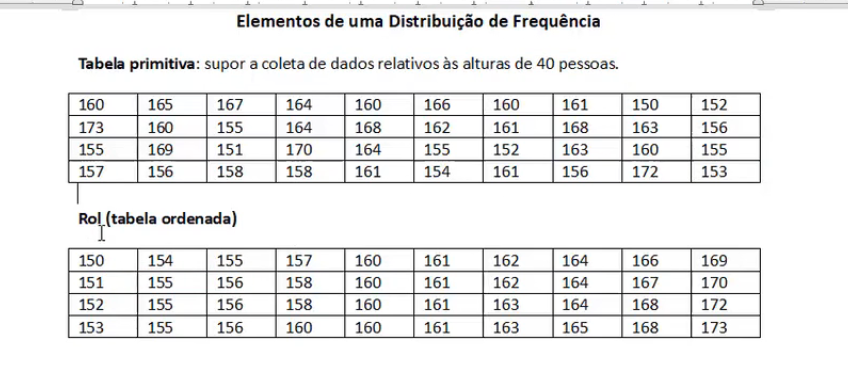

Depois fazemos a tabela de frequencia

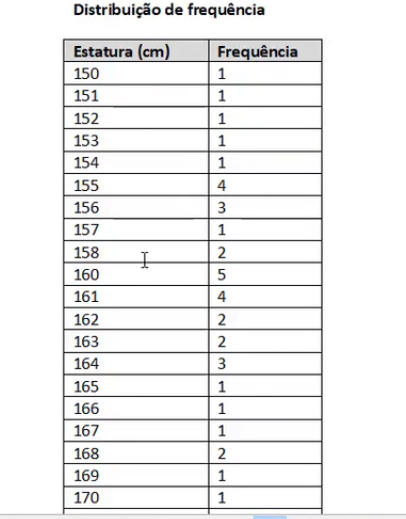

Agora faremos um agrupamento por intervalos regulares

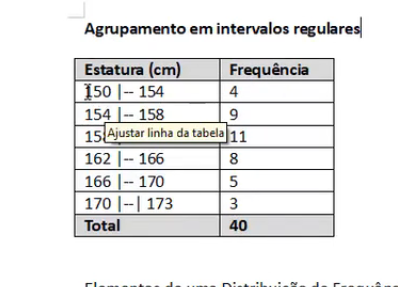

Alguns conceitos importantes

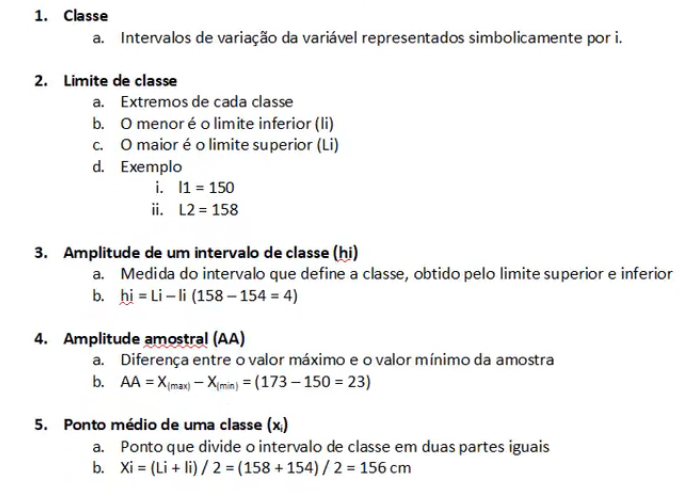

Como construir a tabela:

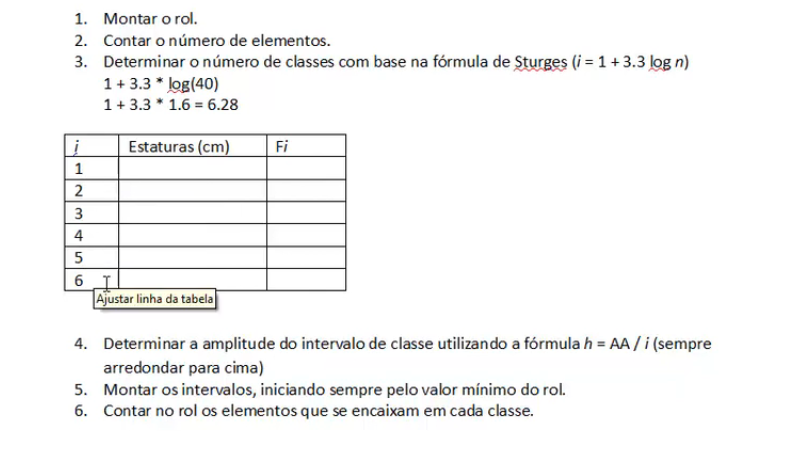

# Implementando

## Distribuição de frequencia para valor_pedido

In [30]:
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd

In [31]:
valor_total = genfromtxt('/content/drive/MyDrive/Mineração de Regras de Associação com python, Apriori e SQL/Mineração de Regras de Associação com Python, Apriori e SQL/valor_total_antes_distribuicao.csv')

In [32]:
valor_total =  valor_total[1:]

In [33]:
len(valor_total)

1000

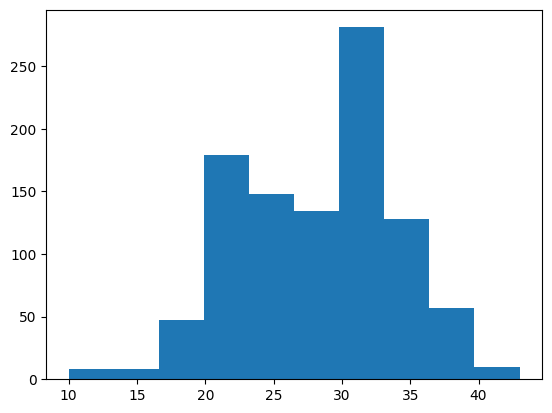

In [34]:
histograma = plt.hist(valor_total) # sturges é a que vimos acima

In [35]:
print(histograma)

(array([  8.,   8.,  47., 179., 148., 134., 281., 128.,  57.,  10.]), array([10. , 13.3, 16.6, 19.9, 23.2, 26.5, 29.8, 33.1, 36.4, 39.7, 43. ]), <BarContainer object of 10 artists>)


Com isso temos as classes dos intervalos de frequenicia, vamos colocar isso no mysql

## Distribuição de frequencia para tempo_pedido

In [36]:
tempo_decorrido =  genfromtxt('/content/drive/MyDrive/Mineração de Regras de Associação com python, Apriori e SQL/Mineração de Regras de Associação com Python, Apriori e SQL/tempo-decorrido.csv')
tempo_decorrido

array([nan, 30., 43., ..., 34., 24., 27.])

In [37]:
tempo_decorrido =  tempo_decorrido[1:]

In [38]:
len(valor_total)

1000

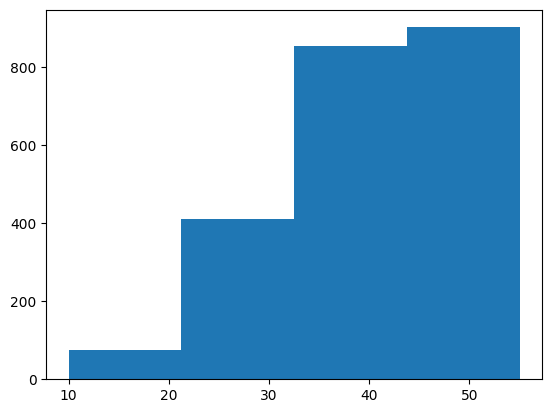

In [39]:
histograma = plt.hist(tempo_decorrido, bins = 4) # sugerido pelo professor

In [40]:
print(histograma)

(array([ 75., 412., 854., 903.]), array([10.  , 21.25, 32.5 , 43.75, 55.  ]), <BarContainer object of 4 artists>)


# Regras de associação
agora para o DataFrame já transformado

In [41]:
pizzaria = pd.read_csv('/content/drive/MyDrive/Mineração de Regras de Associação com python, Apriori e SQL/Projeto base pizzaria/pizzaria_final.csv')
pizzaria.head()

,dia,periodo,tipo_entrega,borda,refrigerante,valor_total,tempo
0,Friday,Inicio,Buscar,Borda Nao,Refri Nao,vl 30-34,tp 22-33
1,Friday,Inicio,Buscar,Borda Nao,Refri Nao,vl 30-34,tp 33-44
2,Friday,Inicio,Buscar,Borda Nao,Refri Nao,vl 26-30,tp 33-44
3,Friday,Inicio,Buscar,Borda Nao,Refri Nao,vl 30-34,tp 33-44
4,Friday,Inicio,Buscar,Borda Nao,Refri Nao,vl 30-34,tp 22-33


In [42]:
!pip install apyori

In [43]:
from apyori import apriori

In [44]:
len(pizzaria)

2244

In [45]:
# Colocando os dados na segunda forma da parte teorica, exigido pelo apyyorri
transacoes = []
for i in range(len(pizzaria)):
  #print(base_mercado.values[i]) # Vai mostrar as linhas
  transacoes.append([str(pizzaria.values[i, j]) for j in range(7)]) # Pegando todos os valores da linha i

In [46]:
print(transacoes)

[['Friday', 'Inicio', 'Buscar', 'Borda Nao', 'Refri Nao', 'vl 30-34', 'tp 22-33'], ['Friday', 'Inicio', 'Buscar', 'Borda Nao', 'Refri Nao', 'vl 30-34', 'tp 33-44'], ['Friday', 'Inicio', 'Buscar', 'Borda Nao', 'Refri Nao', 'vl 26-30', 'tp 33-44'], ['Friday', 'Inicio', 'Buscar', 'Borda Nao', 'Refri Nao', 'vl 30-34', 'tp 33-44'], ['Friday', 'Inicio', 'Buscar', 'Borda Nao', 'Refri Nao', 'vl 30-34', 'tp 22-33'], ['Friday', 'Inicio', 'Entrega', 'Borda Nao', 'Refri Sim', 'vl 30-34', 'tp 33-44'], ['Friday', 'Inicio', 'Buscar', 'Borda Sim', 'Refri Nao', 'vl 30-34', 'tp 10-22'], ['Friday', 'Pico', 'Entrega', 'Borda Nao', 'Refri Sim', 'vl 34-38', 'tp 22-33'], ['Friday', 'Pico', 'Buscar', 'Borda Nao', 'Refri Nao', 'vl 22-26', 'tp 33-44'], ['Friday', 'Pico', 'Entrega', 'Borda Nao', 'Refri Nao', 'vl 22-26', 'tp 44-55'], ['Friday', 'Pico', 'buscar', 'Borda Nao', 'Refri Nao', 'vl 18-22', 'tp 33-44'], ['Friday', 'Pico', 'Entrega', 'Borda Nao', 'Refri Nao', 'vl 22-26', 'tp 44-55'], ['Friday', 'Pico', 'E

In [47]:
# Vai criar as regras '''min_support=0.3, min_confidence=0.8, min_lift=2, min_lenght=2'''
regras = apriori(transacoes, min_support=0.062, min_confidence=0.2, min_lift=1.2, min_lenght=2)
regras = list(regras)
len(regras)

20

Para decidir os parametros, depende muito do projeto que estamos pensando, para calcular o valor do suporte devemos pensar em quantas vezes queremos que um evento aconteca por dia, multiplicatr pelo numero de dias que estao na tabela e dividir pelo numero de linhas da mesma tabela, a partir disso vamos alterando o valor da confiança e do lift para melhorar o numero de regras

In [48]:
#  Pegta todas as regras para o conjunto 2
for i in range(len(regras[2][2])):
  print(f'regra {i+1}: {regras[2][2][i]}')

regra 1: OrderedStatistic(items_base=frozenset({'vl 26-30'}), items_add=frozenset({'Buscar', 'Borda Nao'}), confidence=0.4441489361702127, lift=1.2427309386109193)
regra 2: OrderedStatistic(items_base=frozenset({'Buscar', 'Borda Nao'}), items_add=frozenset({'vl 26-30'}), confidence=0.20822942643391518, lift=1.242730938610919)


In [49]:
# Armazenando os valores para ficar mais legivel
valores_x = [] # Valor do SE
valores_y = [] # Valor do ENTAO
suporte = []
confianca = []
lift = []
# Resultados tem as regras de cada conjunto
for resultado in regras:
  sup = resultado[1] # Suporte
  result_rule = resultado[2] # Regras do conjunto em questao

  # precisamos percorrer as regras
  for regra in result_rule:
    x = list(regra[0]) # Pega o x
    y = list(regra[1]) # pega o y
    c = regra[2] # COnfiança
    l = regra[3] # lift

    # Colocando nas listas
    valores_x.append(x)
    valores_y.append(y)
    suporte.append(sup)
    confianca.append(c)
    lift.append(l)



In [50]:
regras_df = pd.DataFrame({'SE': valores_x,
                          'ENTAO': valores_y,
                          'Suporte': suporte,
                          'Confianca': confianca,
                          'Lift': lift})

regras_df.sort_values(by='Confianca', ascending=False)

,SE,ENTAO,Suporte,Confianca,Lift
1,[vl 18-22],[Refri Nao],0.085116,0.989637,1.202353
5,"[Borda Nao, vl 18-22]",[Refri Nao],0.084670,0.989583,1.202287
4,[vl 18-22],"[Refri Nao, Borda Nao]",0.084670,0.984456,1.377256
37,"[Entrega, vl 22-26]","[Refri Nao, Borda Nao]",0.108734,0.949416,1.328236
41,"[Pico, vl 22-26]","[Refri Nao, Borda Nao]",0.090909,0.883117,1.235483
6,[vl 22-26],"[Refri Nao, Borda Nao]",0.167558,0.874419,1.223314
32,"[Borda Nao, Pico, Refri Sim]",[Entrega],0.063725,0.711443,1.227116
15,"[Pico, Refri Sim]",[Entrega],0.073084,0.706897,1.219274
20,"[Refri Nao, vl 34-38]",[Entrega],0.081551,0.698473,1.204746
30,"[Pico, Refri Sim]","[Borda Nao, Entrega]",0.063725,0.616379,1.210110


Temos que ter cuidado com regras que envolvam refri nao e borda nao, uma vez que a maioria das pessoas pedes sem ambos, entao o algoritmo tende a criar regras pouco eficazes

Tambem poderiamos tentar rodar sem esses atributos e analisar qual vale mais a pena

In [51]:
# Tentando utilizar regras de associação para se os clientes vão buscar  ou nao de acordo com dia da semana e valor
df = pizzaria.iloc[:, [0,1,2,5]]
df

,dia,periodo,tipo_entrega,valor_total
0,Friday,Inicio,Buscar,vl 30-34
1,Friday,Inicio,Buscar,vl 30-34
2,Friday,Inicio,Buscar,vl 26-30
3,Friday,Inicio,Buscar,vl 30-34
4,Friday,Inicio,Buscar,vl 30-34
...,...,...,...,...
2239,Friday,Pico,Entrega,vl 26-30
2240,Friday,Pico,Entrega,vl 30-34
2241,Friday,Pico,Entrega,vl 34-38
2242,Friday,Pico,Buscar,vl 30-34


In [55]:
# Colocando os dados na segunda forma da parte teorica, exigido pelo apyyorri
transacoes = []
for i in range(len(df)):
  #print(base_mercado.values[i]) # Vai mostrar as linhas
  transacoes.append([str(df.values[i, j]) for j in range(4)]) # Pegando todos os valores da linha i
# Vai criar as regras '''min_support=0.3, min_confidence=0.8, min_lift=2, min_lenght=2'''

regras = apriori(transacoes, min_support=0.003, min_confidence=0.2, min_lift=2, min_lenght=2)
regras = list(regras)
len(regras)
# Armazenando os valores para ficar mais legivel
valores_x = [] # Valor do SE
valores_y = [] # Valor do ENTAO
suporte = []
confianca = []
lift = []
# Resultados tem as regras de cada conjunto
for resultado in regras:
  sup = resultado[1] # Suporte
  result_rule = resultado[2] # Regras do conjunto em questao

  # precisamos percorrer as regras
  for regra in result_rule:
    x = list(regra[0]) # Pega o x
    y = list(regra[1]) # pega o y
    c = regra[2] # COnfiança
    l = regra[3] # lift

    # Colocando nas listas
    valores_x.append(x)
    valores_y.append(y)
    suporte.append(sup)
    confianca.append(c)
    lift.append(l)

regras_df = pd.DataFrame({'SE': valores_x,
                          'ENTAO': valores_y,
                          'Suporte': suporte,
                          'Confianca': confianca,
                          'Lift': lift})

regras_df.sort_values(by='Confianca', ascending=False)

,SE,ENTAO,Suporte,Confianca,Lift
0,[vl 10-14],[Buscar],0.004902,1.000000,2.423326
25,"[vl42-46, Tuesday]","[Pico, Entrega]",0.003119,1.000000,3.032432
12,"[Friday, buscar]",[vl 18-22],0.003119,0.875000,10.173575
7,[vl42-46],"[Pico, Entrega]",0.009358,0.807692,2.449272
17,"[Pico, buscar]",[vl 18-22],0.003119,0.777778,9.043178
4,[buscar],[vl 18-22],0.005793,0.764706,8.891192
13,"[vl 18-22, buscar]",[Friday],0.003119,0.538462,2.836403
18,"[Buscar, Friday, vl 22-26]",[Final],0.006239,0.482759,2.642220
2,[buscar],[Friday],0.003565,0.470588,2.478873
3,[Monday],[vl 22-26],0.003119,0.466667,2.435349
